# Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from Kaggle, and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from Kaggle
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in Kaggle's `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the three "configurations":

1. Using a `tensorflow` network
2. Using a `keras` "sequential" network
3. Using a `keras` convolutional network
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

### Import Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

%matplotlib inline

# Note if the version of tensorflow is 2.0, the original following import statement 
# "from keras.models import Sequential"will leads to an error when run "model = Sequential()".
# Solution is add "tensorflow." in front of keras as abvoe.

### Load Data

In [133]:
df = pd.read_csv('./data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### EDA

In [134]:
print(f'Train set dimension: {df.shape}')
print(f'Missing value: {df.isnull().sum().sum()}')

Train set dimension: (42000, 785)
Missing value: 0


In [135]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### X and y

In [136]:
X = df.loc[:,'pixel0':]
y = df['label']

In [137]:
print(f'X dimension: {X.shape}')
print(f'y dimension: {y.shape}')

X dimension: (42000, 784)
y dimension: (42000,)


### Preprocessing

#### Normalize X & One Hot Encoding y

In [138]:
# Normalize X by dividing each pixel by 255
X = X.values.astype(float)
X /= 255
# X = X.reshape(42_000, 784, 1)

# One-Hot-Encoding y
y = to_categorical(y)

In [139]:
# Verify X
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
X.shape

(42000, 784)

In [141]:
# Verify y
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [142]:
y.shape

(42000, 10)

#### Train/Test Split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Modeling

In [222]:
# Instantiate Keras Sequential model

model = Sequential()

model.add(Flatten())

# Input layer
model.add(Dense(1024,
                input_shape=(1, 784), 
                activation='relu'))

# 1st hidden layer with 512 neurons that is densely connected to the input layer
model.add(Dense(512,
                activation='relu'))

# 2nd hidden layer with 512 neurons that is densely connected to the input layer
model.add(Dense(256,
                activation='relu'))

# 2nd hidden layer with 512 neurons that is densely connected to the input layer
model.add(Dense(32,
                activation='relu'))

# output layer
model.add(Dense(10,
                activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Fit model on training set
hist = model.fit(X_train,
                 y_train,
                 batch_size=256,
                 epochs=13,
                 verbose=1,
                 validation_data=(X_test, y_test)
                 )

Train on 31500 samples, validate on 10500 samples
Epoch 1/13
31500/31500 [==============================] - 3s 85us/sample - loss: 0.3863 - acc: 0.8833 - val_loss: 0.1922 - val_acc: 0.9376
Epoch 2/13
31500/31500 [==============================] - 2s 75us/sample - loss: 0.1195 - acc: 0.9640 - val_loss: 0.1262 - val_acc: 0.9617
Epoch 3/13
31500/31500 [==============================] - 2s 75us/sample - loss: 0.0765 - acc: 0.9759 - val_loss: 0.1089 - val_acc: 0.9654
Epoch 4/13
31500/31500 [==============================] - 2s 78us/sample - loss: 0.0498 - acc: 0.9843 - val_loss: 0.1113 - val_acc: 0.9656
Epoch 5/13
31500/31500 [==============================] - 3s 83us/sample - loss: 0.0329 - acc: 0.9895 - val_loss: 0.0851 - val_acc: 0.9749
Epoch 6/13
31500/31500 [==============================] - 2s 76us/sample - loss: 0.0242 - acc: 0.9923 - val_loss: 0.1059 - val_acc: 0.9715
Epoch 7/13
31500/31500 [==============================] - 2s 76us/sample - loss: 0.0291 - acc: 0.9907 - val_loss: 0.

### Model Evaluation

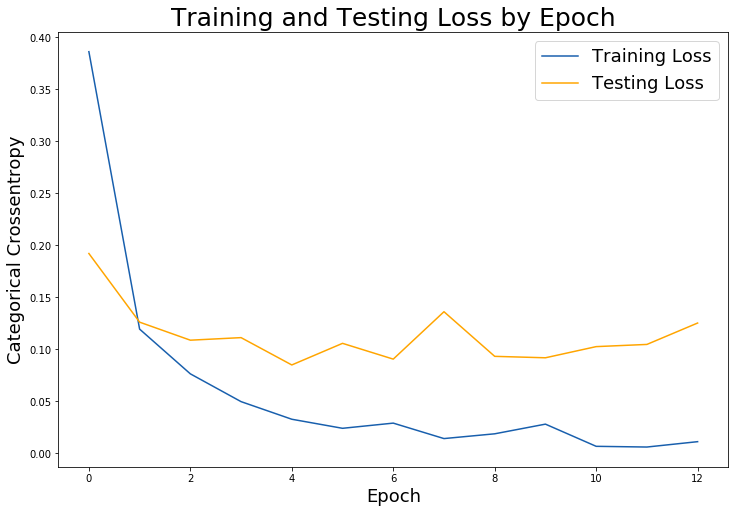

In [223]:
# Check out our train loss and test loss over epochs.
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
# plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [224]:
# Evaluate model on test data.
score = model.evaluate(X_test, y_test, verbose=1)

labels = model.metrics_names

10500/10500 [==============================] - 2s 155us/sample - loss: 0.1254 - acc: 0.9728


In [225]:
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

loss: 0.12538889419814078
acc: 0.9727619290351868


In [226]:
# Check out the model summary.
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_43 (Dense)             multiple                  803840    
_________________________________________________________________
dense_44 (Dense)             multiple                  524800    
_________________________________________________________________
dense_45 (Dense)             multiple                  131328    
_________________________________________________________________
dense_46 (Dense)             multiple                  8224      
_________________________________________________________________
dense_47 (Dense)             multiple                  330       
Total params: 1,468,522
Trainable params: 1,468,522
Non-trainable params: 0
___________________________________________

### Remodel Using Full Training Set

In [212]:
# Instantiate Keras Sequential model

model = Sequential()

model.add(Flatten())

# Input layer
model.add(Dense(1024,
                input_shape=(1, 784), 
                activation='relu'))

# 1st hidden layer with 512 neurons that is densely connected to the input layer
model.add(Dense(512,
                activation='relu'))

# output layer
model.add(Dense(10,
                activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Fit model on training set
hist = model.fit(X,
                 y,
                 batch_size=256,
                 epochs=12,
                 verbose=1,
#                  validation_data=(X_test, y_test)
                 )

Epoch 1/12
42000/42000 [==============================] - 3s 83us/sample - loss: 0.2725 - acc: 0.9205
Epoch 2/12
42000/42000 [==============================] - 3s 77us/sample - loss: 0.0911 - acc: 0.9721
Epoch 3/12
42000/42000 [==============================] - 3s 76us/sample - loss: 0.0581 - acc: 0.9820
Epoch 4/12
42000/42000 [==============================] - 3s 79us/sample - loss: 0.0350 - acc: 0.9890
Epoch 5/12
42000/42000 [==============================] - 3s 80us/sample - loss: 0.0238 - acc: 0.9925
Epoch 6/12
42000/42000 [==============================] - 3s 78us/sample - loss: 0.0142 - acc: 0.9961
Epoch 7/12
42000/42000 [==============================] - 3s 79us/sample - loss: 0.0127 - acc: 0.9964
Epoch 8/12
42000/42000 [==============================] - 3s 78us/sample - loss: 0.0127 - acc: 0.9957
Epoch 9/12
42000/42000 [==============================] - 3s 79us/sample - loss: 0.0089 - acc: 0.9973
Epoch 10/12
42000/42000 [==============================] - 3s 79us/sample - loss: 

### Submission

In [161]:
X_df = pd.read_csv('./data/test.csv')

In [162]:
X_sub = X_df.values.astype(float)
X_sub /= 255
X_sub.shape

(28000, 784)

In [213]:
pred = model.predict_classes(X_sub)

In [214]:
to_sub = pd.DataFrame(pred, columns=['Label'])
to_sub['ImageId'] = np.linspace(1, to_sub.shape[0], to_sub.shape[0]).astype(int)
to_sub = to_sub[['ImageId','Label']]
print(f'shape: {to_sub.shape}')
to_sub.head()

shape: (28000, 2)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [215]:
to_sub.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


#### Save to CSV

In [216]:
to_sub.to_csv('./submit_keras_sequential_2.csv', index=False)